# Linear Regression Training Project: Ecommerce Clients

In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). The data includes information about customers of an e-commerce website, including the following:
- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.

In this project, we suppose that the company is trying to decide whether to focus their efforts on their mobile app experience or their website. We are here to help them make a data-driven decision.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the Data


**Note:** As mentioned before, the data comes from a test dataset freely [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). Note that this is a training set and the information does not correspond to real people.

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## Exploratory Data Analysis

First we ask the following question: How are the client's time spent on each platform related to the amount that they spend per year? There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year. On the other side, the second graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.

After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.

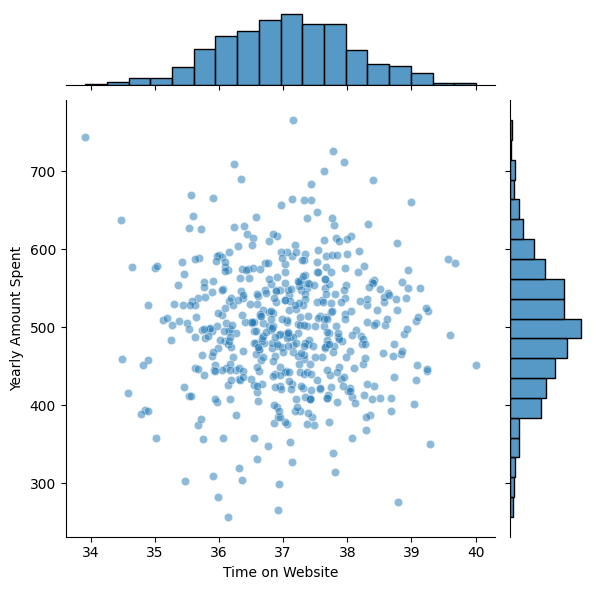

In [8]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5)

In [9]:
customers['Yearly Amount Spent'].corr(customers['Time on Website'])

-0.0026408446721588943

In [10]:
customers['Yearly Amount Spent'].corr(customers['Avg. Session Length'])

0.3550882947076432

In [11]:
customers['Yearly Amount Spent'].corr(customers['Time on App'])

0.4993277700534504

In [12]:
customers['Yearly Amount Spent'].corr(customers['Length of Membership'])

0.809083568247581

In [13]:
customers['Yearly Amount Spent'].corr(customers['Yearly Amount Spent'])

1.0

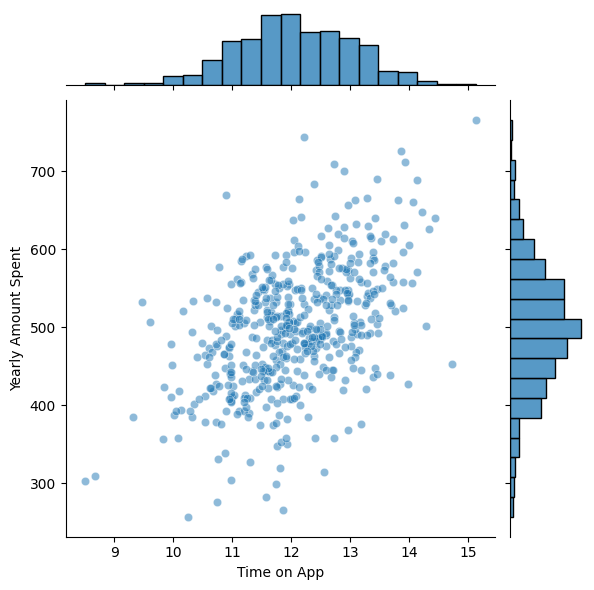

In [14]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

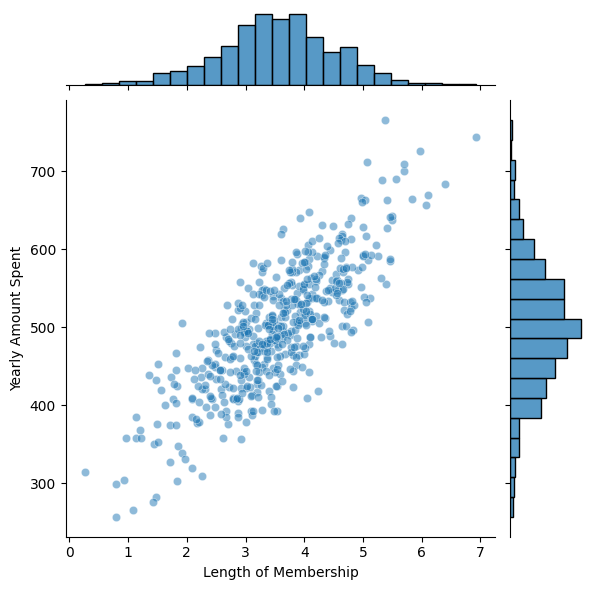

In [15]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, alpha=0.5)

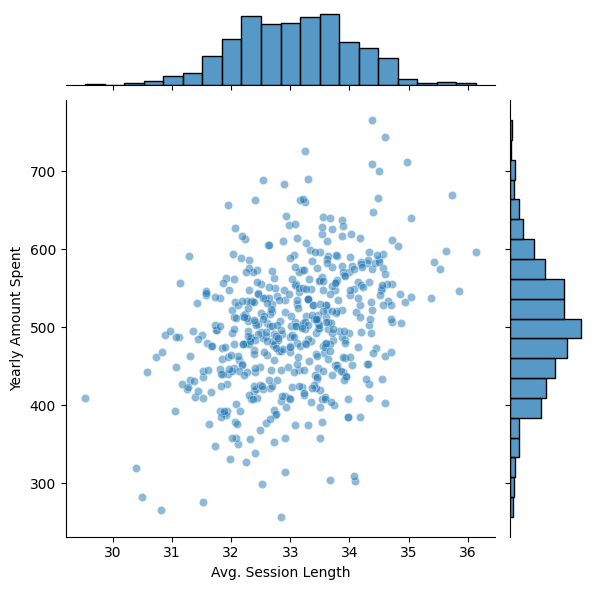

In [16]:
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=customers, alpha=0.5)

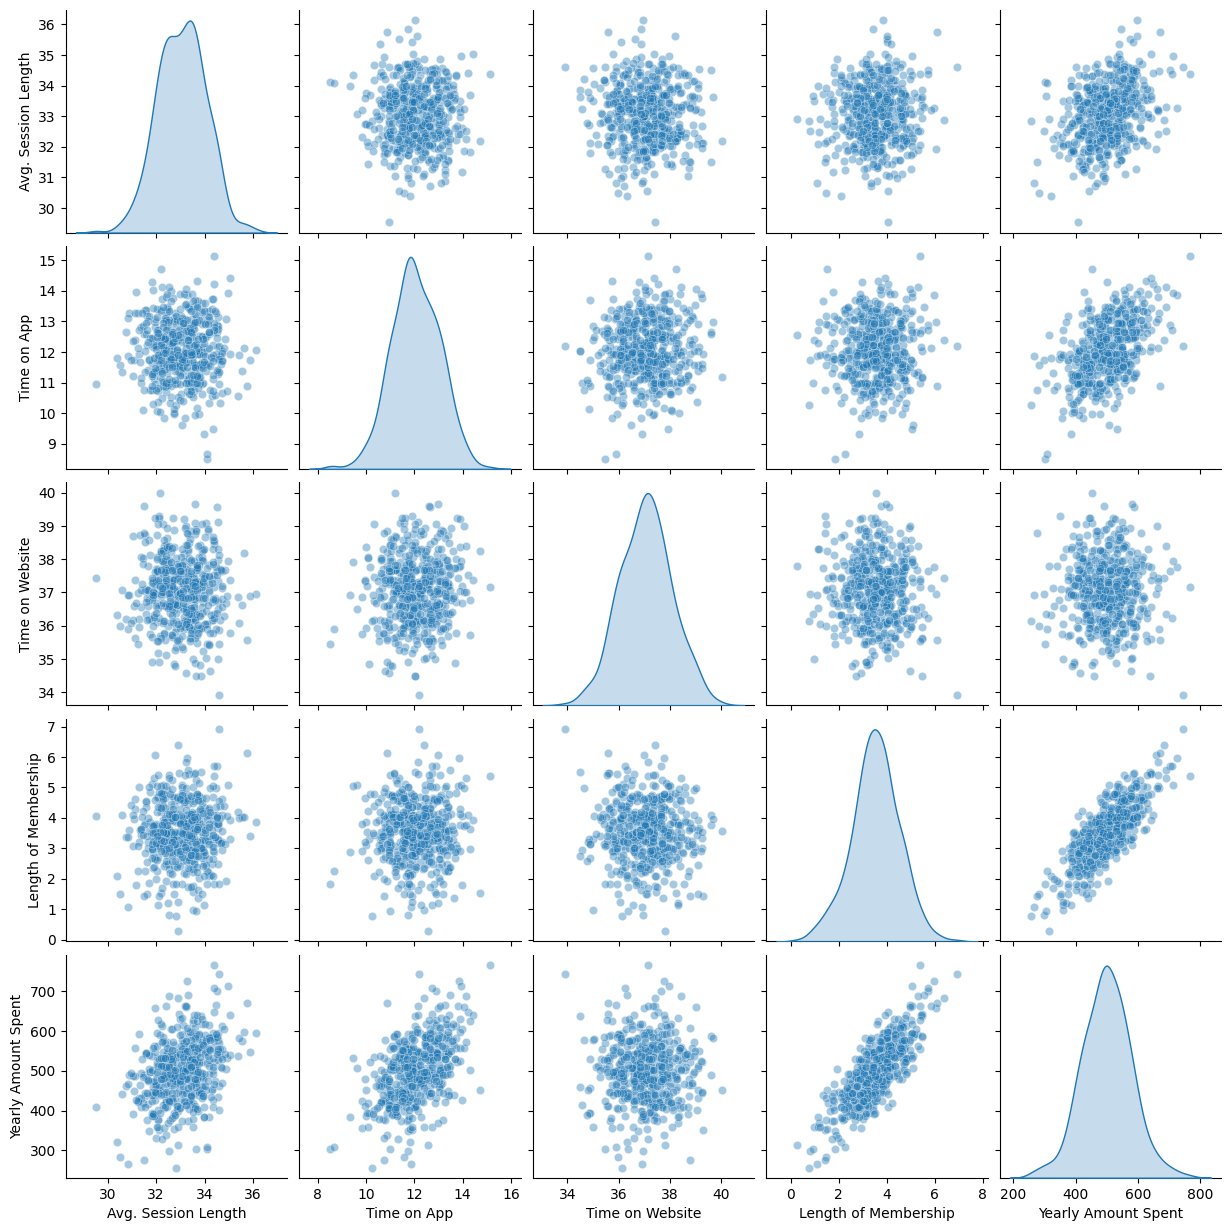

In [17]:
sns.pairplot(customers, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
#              diag_kws={'alpha':0.55, 'bins':40},
            diag_kind='kde')


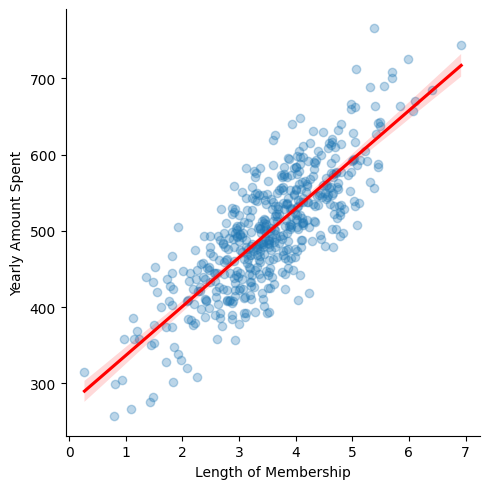

In [25]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3},
          line_kws={'color': 'red'})

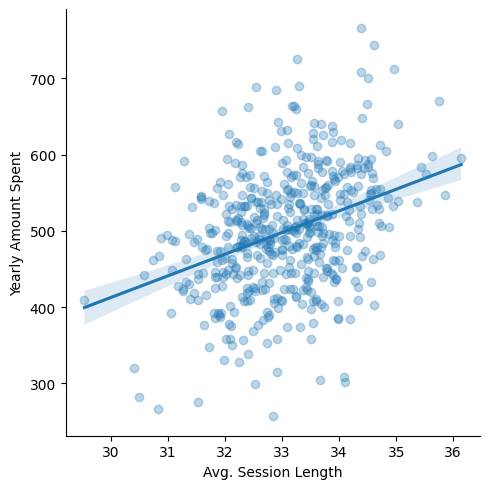

In [26]:
# length of membership vs yearly amount spent
sns.lmplot(x='Avg. Session Length', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

In [27]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

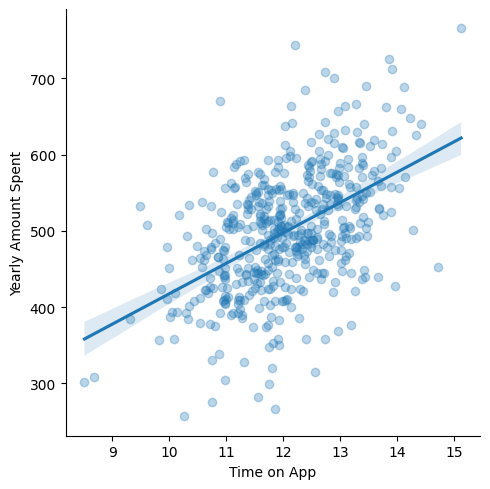

In [28]:
# length of membership vs yearly amount spent
sns.lmplot(x='Time on App', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

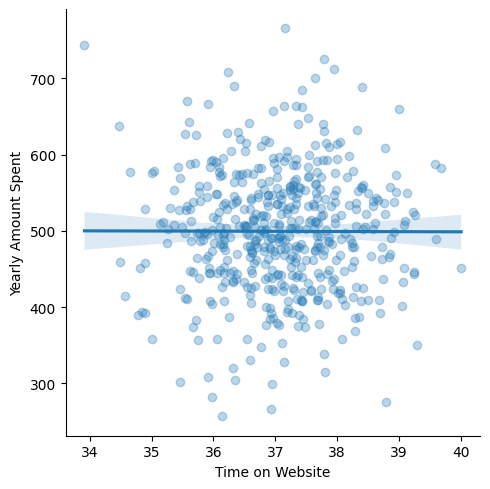

In [29]:
# length of membership vs yearly amount spent
sns.lmplot(x='Time on Website', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

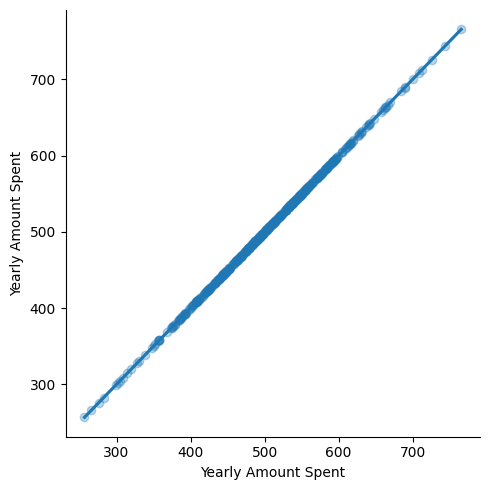

In [30]:
# length of membership vs yearly amount spent
sns.lmplot(x='Yearly Amount Spent', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

## Splitting the data

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [33]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [34]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Training the Model with multivariable regression using Scikit Learn

In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output (yearly expenditure). As the plots suggested, we find that the most important coefficient is that of the "Length of Membership" predictor, followed by the 'Time on App' and the 'Avg. Session Length'. The time on website does not seem to be an important factor to the amount a customer spends per year.

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
# the coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [40]:
# r squared
lm.score(X, y)

0.9842821675307222

In [41]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## Training the model with multivariable regression using OLS

Allows us to get more details about the moel

In [43]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Thu, 07 Nov 2024   Prob (F-statistic):          3.46e-315
Time:                         09:08:17   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

## Predicting Test Data
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [50]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

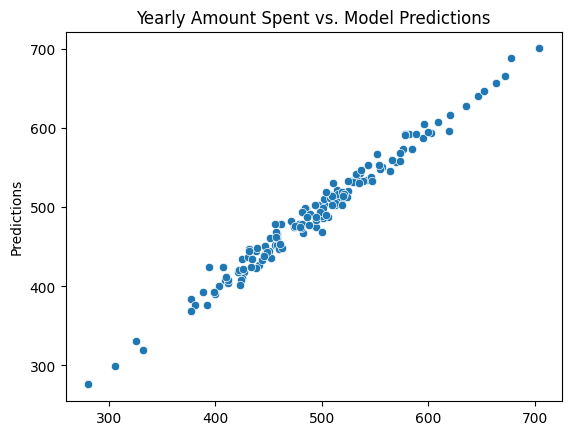

In [51]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x= predictions,y= y_test)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

## Evaluation of the model

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [47]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432052
Mean Squared Error: 103.91554136503235
Root Mean Squared Error: 10.193897260863107


## Residuals
Distribution plot of the residuals of the model's predictions. They should be normally distributed.

C:\Users\SAJID\AppData\Local\Temp\ipykernel_16256\339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

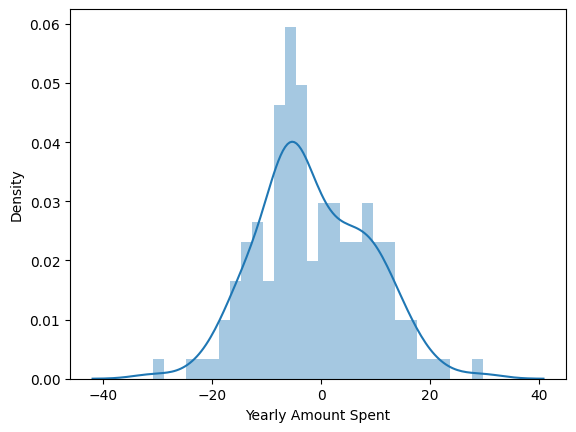

In [48]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

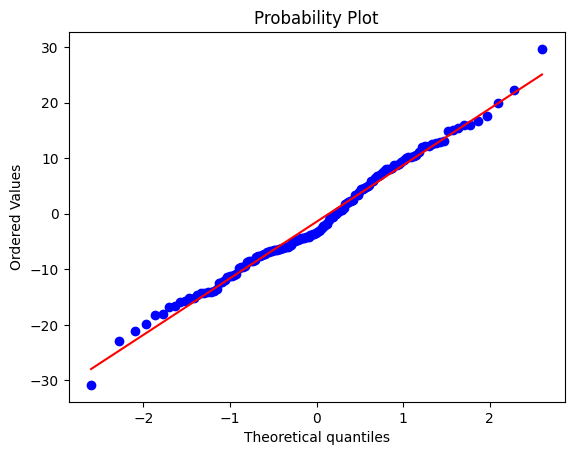

In [49]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Conclusion

It can be tricky to interpret the information in this analysis. According to the model, the most significant factor for clients is not the time spent on the app or website, but their length of membership. However, of the two predictors (desktop vs app), the app has the strongest influence by far. In fact, the time spent on the desktop website does not seem to have any correlation at all! In other words, according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend. 

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. Indeed, the interpretation of this information requires expertise in the online marketing sphere. Our analysis and our model, however, does a very good job in weighting the predictors importance.